<a href="https://colab.research.google.com/github/MikhailKuklin/data_science_exercises/blob/main/2021_05_31_exploratory_data_analysis_pandas_partI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
# load necessary library/modules

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [212]:
# open database file - cvs in that case

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [213]:
# basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92339 entries, 0 to 92338
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               92339 non-null  object 
 1   continent                              87958 non-null  object 
 2   location                               92339 non-null  object 
 3   date                                   92339 non-null  object 
 4   total_cases                            89549 non-null  float64
 5   new_cases                              89548 non-null  float64
 6   new_cases_smoothed                     88536 non-null  float64
 7   total_deaths                           79642 non-null  float64
 8   new_deaths                             79800 non-null  float64
 9   new_deaths_smoothed                    88536 non-null  float64
 10  total_cases_per_million                89070 non-null  float64
 11  ne

In [214]:
# get names of all columns

df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [215]:
# get a range of rows

df.index

RangeIndex(start=0, stop=92339, step=1)

In [216]:
# get number of columns and rows

df.shape

(92339, 59)

In [217]:
# check if database has duplicated

df.drop_duplicates().shape

(92339, 59)

In [240]:
# check table

df.head()
#df.tail(10)
#df.describe()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [219]:
# average

df.mean()

total_cases                              9.389156e+05
new_cases                                6.060785e+03
new_cases_smoothed                       6.075183e+03
total_deaths                             2.528245e+04
new_deaths                               1.422173e+02
new_deaths_smoothed                      1.270840e+02
total_cases_per_million                  1.152139e+04
new_cases_per_million                    7.603640e+01
new_cases_smoothed_per_million           7.624986e+01
total_deaths_per_million                 2.511951e+02
new_deaths_per_million                   1.515444e+00
new_deaths_smoothed_per_million          1.356222e+00
reproduction_rate                        1.009005e+00
icu_patients                             1.097993e+03
icu_patients_per_million                 2.712921e+01
hosp_patients                            4.821805e+03
hosp_patients_per_million                1.755495e+02
weekly_icu_admissions                    2.910447e+02
weekly_icu_admissions_per_mi

In [220]:
df[['new_deaths','new_cases']].mean()

new_deaths     142.217256
new_cases     6060.785400
dtype: float64

In [221]:
df[df.continent=='Asia'][['new_deaths','new_cases']].mean()

new_deaths      36.410162
new_cases     2347.655694
dtype: float64

In [222]:
# slicing

df[df.continent=='Asia'][['new_deaths','new_cases']][20000:20010]

,new_deaths,new_cases
85332,141.0,5103.0
85333,135.0,5532.0
85334,139.0,6017.0
85335,153.0,6713.0
85336,161.0,7381.0
85337,168.0,6814.0
85338,174.0,36008.0
85339,177.0,44506.0
85340,182.0,30103.0
85341,185.0,29281.0


In [223]:
# unique

df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [224]:
# drop nans

df['continent'].dropna().unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [225]:
#df.sort_values('new_cases_per_million',ascending=False)

df[['continent','location','new_cases_per_million']].sort_values('new_cases_per_million')

,continent,location,new_cases_per_million
30417,Europe,France,-5160.525
49524,Europe,Luxembourg,-2153.437
78558,Europe,Spain,-1590.147
30220,Europe,France,-681.958
71257,Europe,San Marino,-559.844
...,...,...,...
90547,Oceania,Wallis and Futuna,NaN
90548,Oceania,Wallis and Futuna,NaN
90549,Oceania,Wallis and Futuna,NaN
90550,Oceania,Wallis and Futuna,NaN


In [226]:
df_europe=df[df.continent=='Europe']

In [227]:
df_europe[df_europe.location=='France']['total_cases'].max()

5978650.0

In [228]:
df_europe[df_europe.continent=='Europe']['new_cases'].sum()

46849615.0

In [229]:
countries=df_europe.location.unique()

for country in countries:
  print(f"{country}:{df_europe[df_europe.location==country]['total_cases'].max()}")

Albania:132309.0
Andorra:13693.0
Austria:644586.0
Belarus:393807.0
Belgium:1061200.0
Bosnia and Herzegovina:203839.0
Bulgaria:418274.0
Croatia:356141.0
Cyprus:72407.0
Czechia:1661159.0
Denmark:281141.0
Estonia:129486.0
Faeroe Islands:nan
Finland:92432.0
France:5978650.0
Germany:3687715.0
Gibraltar:nan
Greece:401301.0
Guernsey:nan
Hungary:804382.0
Iceland:6555.0
Ireland:260783.0
Isle of Man:nan
Italy:4216003.0
Jersey:nan
Kosovo:106997.0
Latvia:133098.0
Liechtenstein:3008.0
Lithuania:274199.0
Luxembourg:69830.0
Malta:30533.0
Moldova:255145.0
Monaco:2504.0
Montenegro:99605.0
Netherlands:1674694.0
North Macedonia:155269.0
Norway:124824.0
Poland:2871950.0
Portugal:848658.0
Romania:1077584.0
Russia:5005171.0
San Marino:5089.0
Serbia:712224.0
Slovakia:389690.0
Slovenia:253631.0
Spain:3668658.0
Sweden:1068473.0
Switzerland:693023.0
Ukraine:2259743.0
United Kingdom:4499937.0
Vatican:27.0


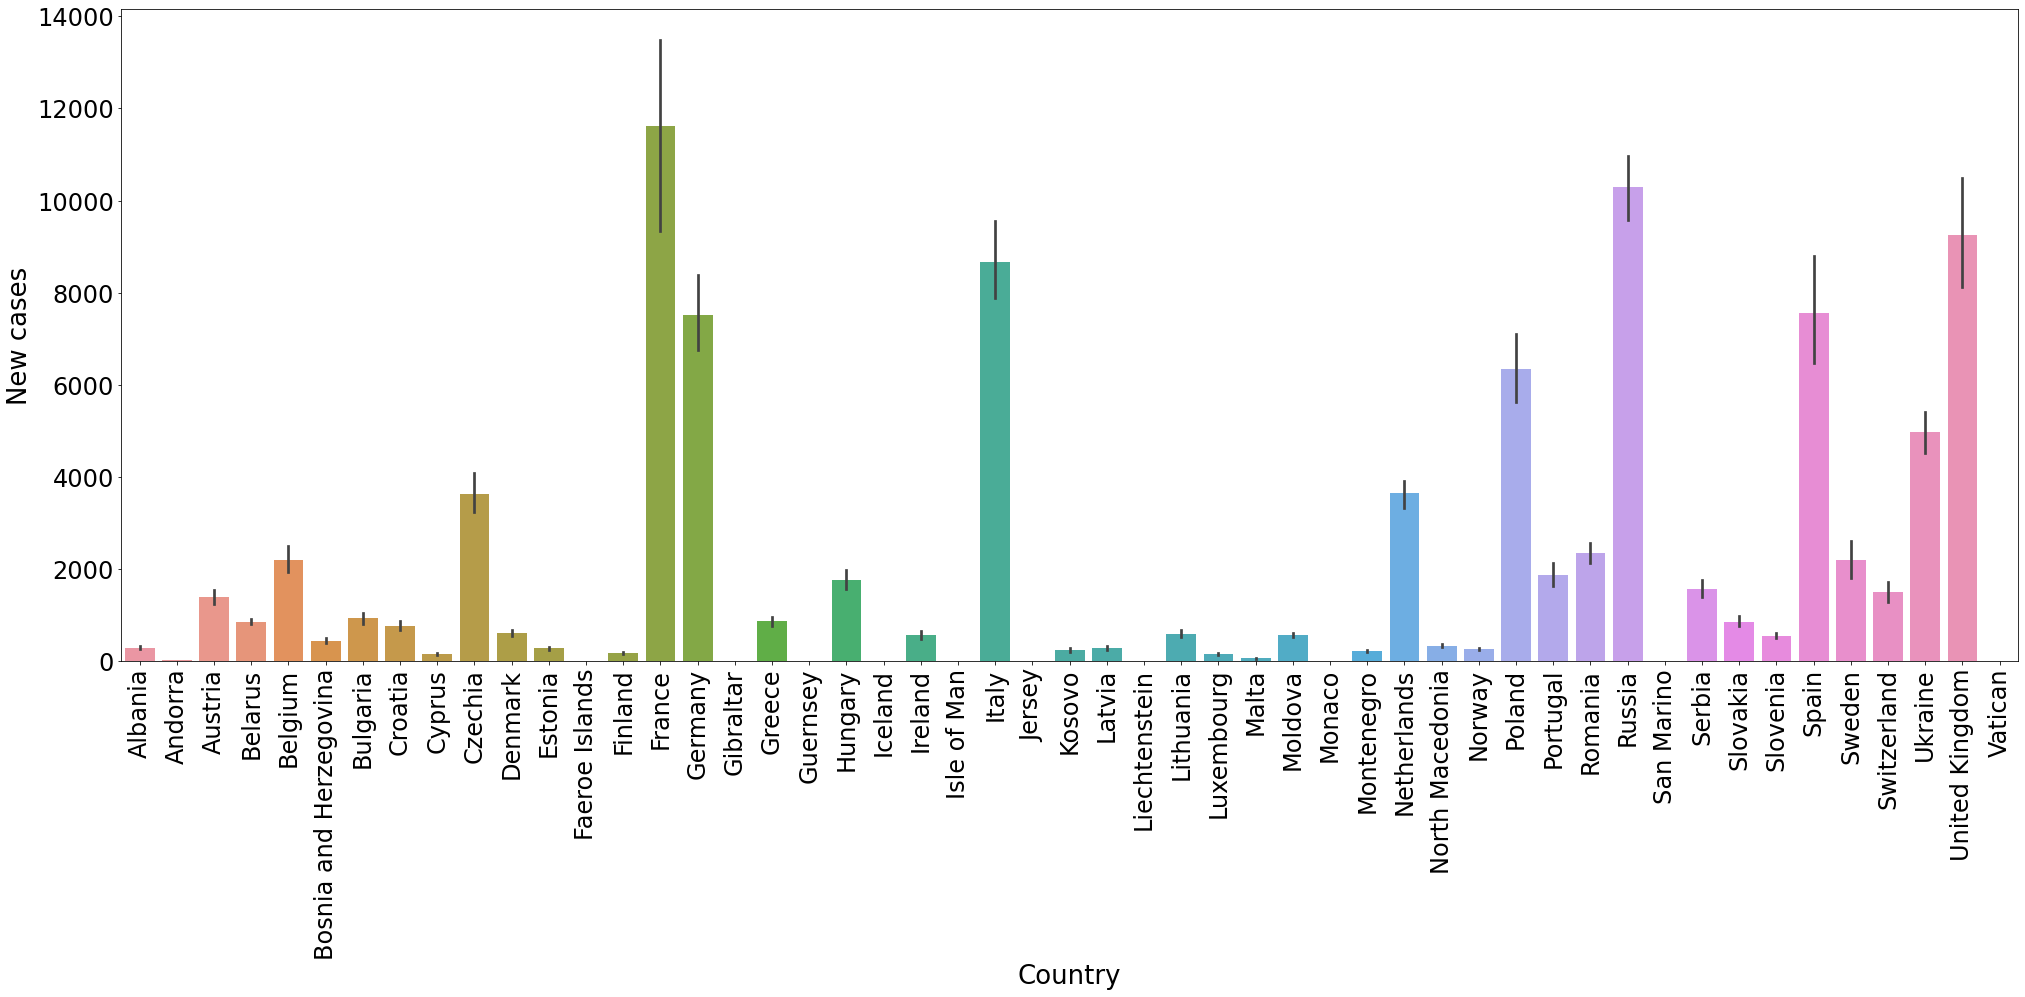

In [230]:
plt.figure(figsize=(34,12))
sns.barplot(x='location',y='new_cases', data=df_europe)
plt.xlabel('Country', fontsize=26)
plt.xticks(fontsize=24,rotation='90')
plt.ylabel('New cases', fontsize=26)
plt.yticks(fontsize=24)
plt.show()

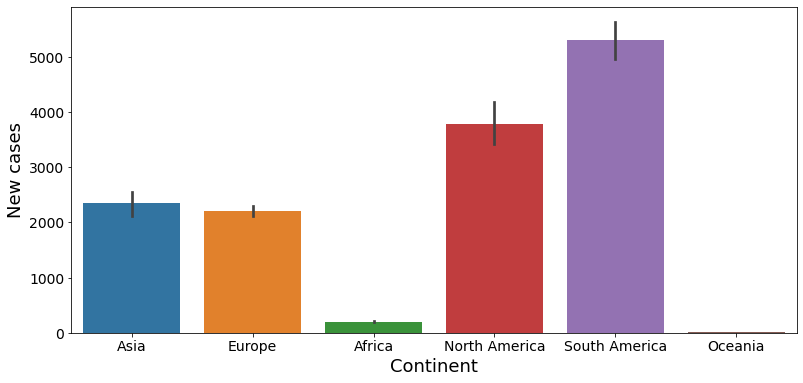

In [231]:
plt.figure(figsize=(13,6))
sns.barplot(x='continent',y='new_cases', data=df)
plt.xlabel('Continent', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('New cases', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

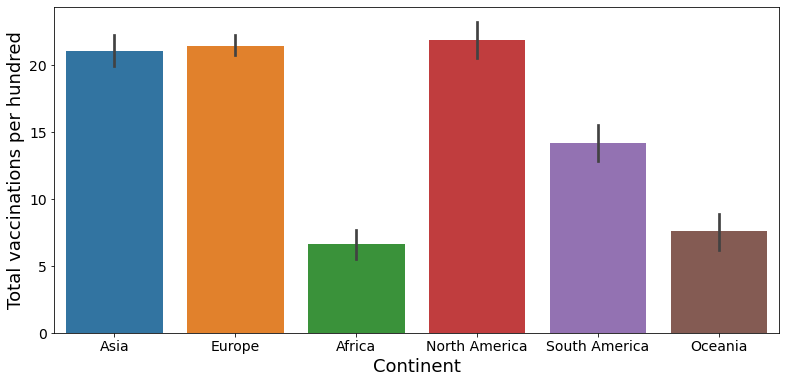

In [232]:
plt.figure(figsize=(13,6))
sns.barplot(x='continent',y='total_vaccinations_per_hundred', data=df)
plt.xlabel('Continent', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Total vaccinations per hundred', fontsize=18)
plt.yticks(fontsize=14)
plt.show()

In [233]:
# correlations

correlat=df.corr()
correlat
#correlat>0.9

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
total_cases,1.000000,0.872504,0.890095,0.986870,0.849941,0.875815,0.130534,0.051613,0.067204,0.155412,0.058242,0.083134,-0.002701,0.747410,0.171606,0.695031,0.069944,0.599093,0.179363,0.702382,0.054360,0.799400,0.959895,0.106709,0.042297,0.826812,0.049119,0.017291,-0.033835,0.776230,0.838881,0.803723,0.760571,0.786745,-0.011208,-0.029759,-0.036357,0.007091,0.072263,0.619118,-0.015880,0.031742,0.029169,0.026095,0.017354,-0.034193,-0.035566,0.019927,-0.000627,-0.009259,0.030764,-0.006905,0.020727,0.036245
new_cases,0.872504,1.000000,0.986774,0.873188,0.926854,0.922255,0.082568,0.100417,0.097193,0.102719,0.077732,0.096533,0.015048,0.910895,0.267208,0.885637,0.157384,0.610931,0.177217,0.906769,0.128828,0.757425,0.652157,0.036602,0.027029,0.756609,0.028726,0.088419,-0.033125,0.655159,0.691655,0.645453,0.675403,0.688707,-0.072908,-0.093368,-0.099784,-0.028374,0.091072,0.690013,-0.017220,0.033451,0.030047,0.026589,0.014039,-0.035371,-0.037468,0.022420,-0.004076,-0.011031,0.035279,-0.009102,0.021082,0.036741
new_cases_smoothed,0.890095,0.986774,1.000000,0.889108,0.922654,0.940276,0.085764,0.077528,0.098729,0.106864,0.073946,0.100364,0.011264,0.953642,0.281280,0.924532,0.165398,0.730375,0.254652,0.938093,0.137381,0.788430,0.684932,0.040228,0.028055,0.799291,0.031615,0.090740,-0.034658,0.672144,0.706909,0.663766,0.681350,0.701543,-0.070561,-0.091250,-0.098323,-0.026732,0.095249,0.699275,-0.017461,0.034182,0.030933,0.027437,0.014507,-0.035675,-0.038007,0.022383,-0.003663,-0.011240,0.035513,-0.008884,0.021479,0.037402
total_deaths,0.986870,0.873188,0.889108,1.000000,0.873554,0.899994,0.119943,0.044987,0.058435,0.173104,0.066063,0.087002,-0.002980,0.767293,0.162847,0.731154,0.079736,0.560881,0.075525,0.711309,0.037696,0.764900,0.886549,0.090503,0.034544,0.787199,0.039260,0.057455,-0.042518,0.739573,0.811799,0.781875,0.724141,0.751124,-0.017676,-0.032442,-0.042325,0.005565,0.076313,0.641588,-0.019711,0.034608,0.031607,0.029121,0.013784,-0.041665,-0.043043,0.026151,-0.002125,-0.008841,0.039689,-0.009639,0.024798,0.040221
new_deaths,0.849941,0.926854,0.922654,0.873554,1.000000,0.974700,0.076370,0.066417,0.077396,0.121895,0.126793,0.130443,0.005608,0.896919,0.322775,0.904848,0.235558,0.631704,0.281261,0.885585,0.184766,0.723675,0.611514,0.020118,0.017490,0.696665,0.013883,0.169612,-0.045444,0.590365,0.631789,0.594828,0.619307,0.630230,-0.082104,-0.099860,-0.107057,-0.031394,0.120763,0.705971,-0.021623,0.036140,0.031396,0.028363,0.008503,-0.043929,-0.041650,0.029106,-0.005359,-0.007454,0.044534,-0.008544,0.023754,0.040067
new_deaths_smoothed,0.875815,0.922255,0.940276,0.899994,0.974700,1.000000,0.088500,0.064781,0.084826,0.128034,0.104168,0.141871,0.004368,0.940913,0.334976,0.945321,0.244826,0.675530,0.219742,0.895989,0.149578,0.728224,0.646025,0.027854,0.017306,0.734060,0.018697,0.176084,-0.046433,0.608696,0.651039,0.615678,0.625244,0.647450,-0.0

In [234]:
col1=df['new_cases_per_million']
col2=df['total_vaccinations_per_hundred']
col1.corr(col2)

0.1481019991462975

In [235]:
country_ml_min=df['location'].loc[df['male_smokers'].idxmin()]
print(f"{country_ml_min} has the lowest number of males smokers:{df['male_smokers'].min()}%")

Ghana has the lowest number of males smokers:7.7%


In [236]:
country_ml_max=df['location'].loc[df['male_smokers'].idxmax()]
print(f"{country_ml_max} has the highest number of males smokers:{df['male_smokers'].max()}%")

Timor has the highest number of males smokers:78.1%


In [237]:
country_fl_max=df['location'].loc[df['female_smokers'].idxmax()]
print(f"{country_fl_max} has the highest number of females smokers:{df['female_smokers'].max()}%")

Montenegro has the highest number of females smokers:44.0%


In [238]:
country_fl_min=df['location'].loc[df['female_smokers'].idxmin()]
print(f"{country_fl_min} has the lowest number of females smokers:{df['female_smokers'].min()}%")

Niger has the lowest number of females smokers:0.1%


In [239]:
country_pvh_max=df['location'].loc[df['people_vaccinated_per_hundred'].idxmax()]
print(f"{country_pvh_max} has the highest number of vaccinated people:{df[df.location==country_pvh_max]['people_vaccinated_per_hundred'].mean():.0f}%")

Gibraltar has the highest number of vaccinated people:70%
